In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

df=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-10-23/movie_profit.csv")
print ('Dosyayı okuma tamamlandı!')




Dosyayı okuma tamamlandı!


In [ ]:
df.head()


,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy
1,2,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure
3,4,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action
4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action


In [ ]:
# yapısal bilgisi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3401 non-null   int64  
 1   release_date       3401 non-null   object 
 2   movie              3401 non-null   object 
 3   production_budget  3401 non-null   float64
 4   domestic_gross     3401 non-null   float64
 5   worldwide_gross    3401 non-null   float64
 6   distributor        3353 non-null   object 
 7   mpaa_rating        3264 non-null   object 
 8   genre              3401 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 239.3+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0             0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
distributor           48
mpaa_rating          137
genre                  0
dtype: int64

In [ ]:

#VERİ DÜZENLEME

# tarih düzenleme ve yeni kolan ekleme
df.release_date =df.release_date.apply(pd.to_datetime)
df['release_year'] = df.release_date.dt.year
df['release_month'] = df.release_date.dt.month
df['release_day'] = df.release_date.dt.day

#null gelen distributor alanlarının "other" ile doldurulması
df["distributor"].fillna("others", inplace = True)

#null gelen mpaa_rating alanlarının silinmesi
df.dropna(how="any",inplace=True)
                        


In [ ]:
# yapısal bilgisi
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3264 entries, 0 to 3400
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         3264 non-null   int64         
 1   release_date       3264 non-null   datetime64[ns]
 2   movie              3264 non-null   object        
 3   production_budget  3264 non-null   float64       
 4   domestic_gross     3264 non-null   float64       
 5   worldwide_gross    3264 non-null   float64       
 6   distributor        3264 non-null   object        
 7   mpaa_rating        3264 non-null   object        
 8   genre              3264 non-null   object        
 9   release_year       3264 non-null   int64         
 10  release_month      3264 non-null   int64         
 11  release_day        3264 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 331.5+ KB


In [ ]:
df.isnull().sum()



Unnamed: 0           0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
distributor          0
mpaa_rating          0
genre                0
release_year         0
release_month        0
release_day          0
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,release_year,release_month,release_day
0,1,2007-06-22,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy,2007,6,22
1,2,1995-07-28,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action,1995,7,28
2,3,2017-05-12,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure,2017,5,12
3,4,2013-12-25,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action,2013,12,25
4,5,2018-06-22,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action,2018,6,22


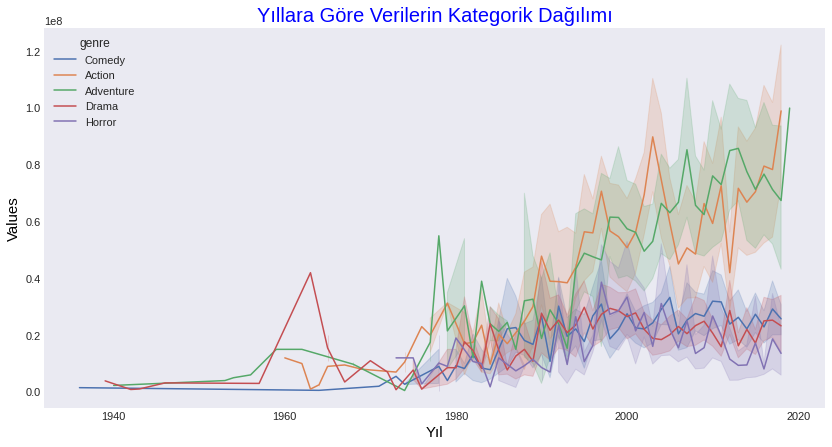

In [ ]:
#veri keşfi
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')

sns.lineplot(x="release_year" , y="production_budget" , hue="genre",data=df)
plt.xlabel('Yıl',fontsize = 15,color='black')
plt.ylabel('Values',fontsize = 15,color='black')
plt.title('Yıllara Göre Verilerin Kategorik Dağılımı',fontsize = 20,color='blue')
plt.grid()
plt.show()

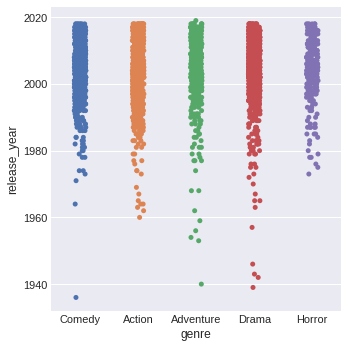

In [ ]:
#veri keşfi
sns.catplot(x="genre", y="release_year", data=df)


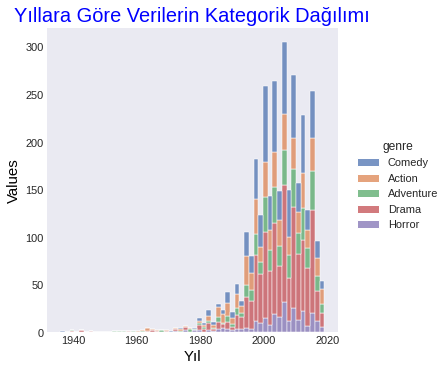

In [ ]:
#veri keşfi
sns.displot(df, x="release_year", hue="genre", multiple="stack")

plt.xlabel('Yıl',fontsize = 15,color='black')
plt.ylabel('Values',fontsize = 15,color='black')
plt.title('Yıllara Göre Verilerin Kategorik Dağılımı',fontsize = 20,color='blue')
plt.grid()

In [ ]:
df_filter_after_1999=df[df["release_year"]>1999]



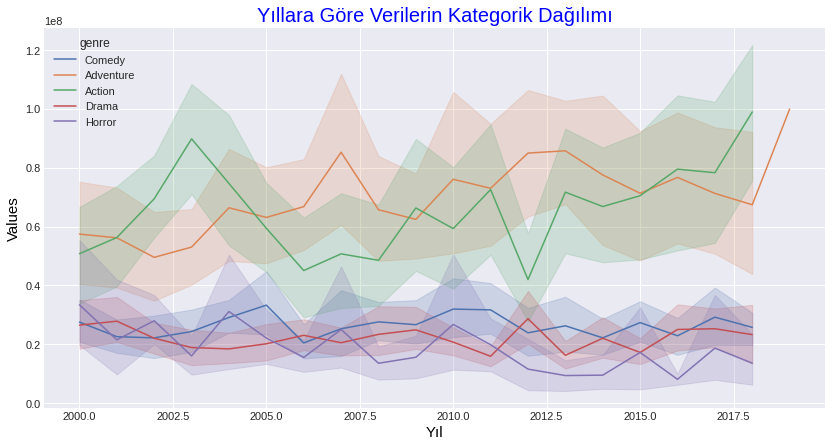

In [ ]:
#1999 yılı sonrasındaki verileri kullandım
df_filter_after_1999=df[df["release_year"]>1999]
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')

sns.lineplot(x="release_year" , y="production_budget" , hue="genre",data=df_filter_after_1999)
plt.xlabel('Yıl',fontsize = 15,color='black')
plt.ylabel('Values',fontsize = 15,color='black')
plt.title('Yıllara Göre Verilerin Kategorik Dağılımı',fontsize = 20,color='blue')

plt.show()

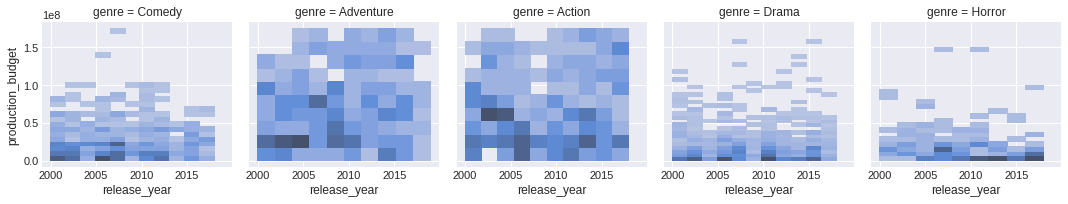

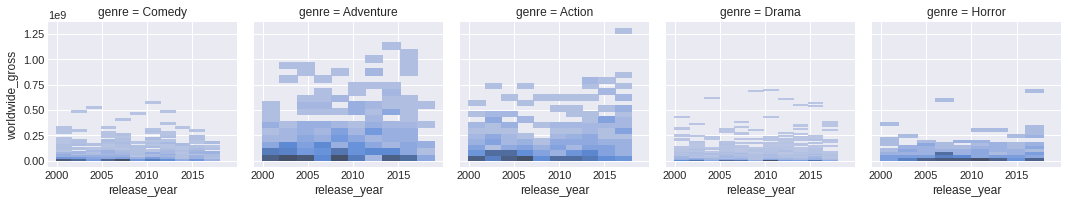

In [ ]:
#veri keşfi
df_filter_after_1999=df[df["release_year"]>1999]
g = sns.FacetGrid(df_filter_after_1999, col="genre")
g.map(sns.histplot, "release_year", "production_budget")


g = sns.FacetGrid(df_filter_after_1999, col="genre")
g.map(sns.histplot, "release_year", "worldwide_gross")




In [ ]:
df_filter_after_1999.describe()

,Unnamed: 0,production_budget,domestic_gross,worldwide_gross,release_year,release_month,release_day
count,2459.000000,2.459000e+03,2.459000e+03,2.459000e+03,2459.000000,2459.000000,2459.000000
mean,1645.013420,3.593547e+07,4.447696e+07,9.721755e+07,2008.440830,6.921513,16.342822
std,995.872192,3.745202e+07,5.906616e+07,1.459910e+08,5.173874,3.449499,8.506064
min,1.000000,2.500000e+05,0.000000e+00,0.000000e+00,2000.000000,1.000000,1.000000
25%,766.500000,1.000000e+07,4.871795e+06,1.010256e+07,2004.000000,4.000000,9.000000
50%,1633.000000,2.200000e+07,2.359143e+07,4.241172e+07,2008.000000,7.000000,17.000000
75%,2503.500000,5.000000e+07,5.966991e+07,1.197037e+08,2013.000000,10.000000,24.000000
max,3401.000000,1.750000e+08,4.412262e+08,1.304866e+09,2019.000000,12.000000,31.000000


Text(0.5, 1.0, 'İzlenen Filmlerin Kategorik Olarak Dağılımı')

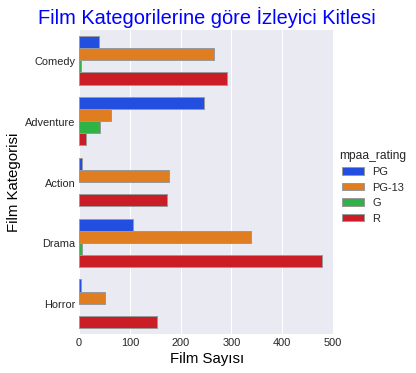

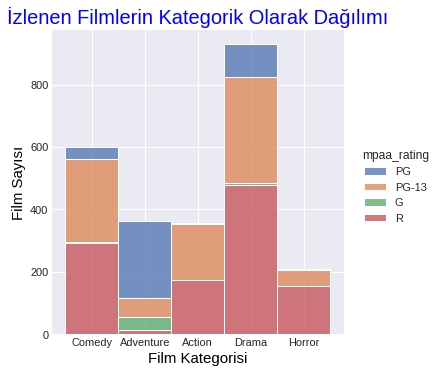

In [ ]:
#soru-1: Filmler kategorilerine göre hangi seyirci kitlesine hitap etmektedir?
#G (General Audiences) ,PG (Parental Guidance Suggested/Some material might not be suitable for children), PG-13 ( Parents Strongly Cautioned/Some material may be inappropriate for children under the age of 13), R (Restricted/Under 17 not admitted without parent or adult guardian), NC-17 (No One 17 and Under Admitted)
sns.catplot(
    data=df_filter_after_1999, y="genre", hue="mpaa_rating", kind="count",
    palette="bright", edgecolor=".6",
)
plt.xlabel('Film Sayısı',fontsize = 15,color='black')
plt.ylabel('Film Kategorisi',fontsize = 15,color='black')
plt.title('Film Kategorilerine göre İzleyici Kitlesi',fontsize = 20,color='blue')


sns.displot(df_filter_after_1999, x="genre", hue="mpaa_rating", multiple="stack")

plt.xlabel('Film Kategorisi',fontsize = 15,color='black')
plt.ylabel('Film Sayısı',fontsize = 15,color='black')
plt.title('İzlenen Filmlerin Kategorik Olarak Dağılımı',fontsize = 20,color='blue')


In [ ]:
#Filmler için harcanan para ve dünya çapındaki brüt kazanılan para kıyaslanmıştır. Bunun için "revenue" adında yeni kolan tanımlanmıştır.
df_filter_after_1999["revenue"] = (df_filter_after_1999["worldwide_gross"] - df_filter_after_1999["production_budget"]) / df_filter_after_1999["production_budget"] * 100
display(df_filter_after_1999.head())
df_rev=df_filter_after_1999.groupby("genre")[["production_budget", "worldwide_gross","revenue"]].agg(np.mean).sort_values(by="revenue", ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,release_year,release_month,release_day,revenue
0,1,2007-06-22,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy,2007,6,22,-0.496383
2,3,2017-05-12,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure,2017,5,12,-20.028167
3,4,2013-12-25,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action,2013,12,25,-13.304677
4,5,2018-06-22,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action,2018,6,22,667.568425
5,6,2014-08-01,Guardians of the Galaxy,170000000.0,333172112.0,7.710513e+08,Walt Disney,PG-13,Action,2014,8,1,353.559609


In [ ]:
display(df_rev)


,production_budget,worldwide_gross,revenue
genre,,,
Horror,1.871142e+07,7.410940e+07,890.820567
Comedy,2.631034e+07,6.639239e+07,204.232135
Adventure,6.847775e+07,2.096504e+08,200.496681
Drama,2.171105e+07,5.026989e+07,192.068451
Action,6.589857e+07,1.698164e+08,151.180238


Text(0.5, 1.0, 'Kategorilere Göre Toplam Kazanç')

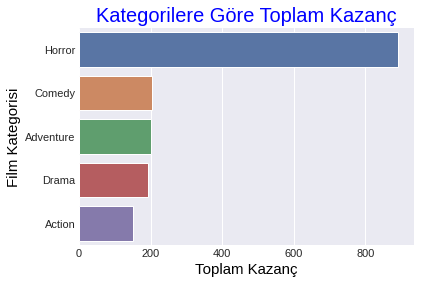

In [ ]:
#soru-2: Dünya çapında izlenen filmlerden kategori bazlı sağlanan kazanç ne kadardır?
sns.barplot(data=df_rev, x="revenue", y=df_rev.index.values)
plt.xlabel('Toplam Kazanç',fontsize = 15,color='black')
plt.ylabel('Film Kategorisi',fontsize = 15,color='black')
plt.title('Kategorilere Göre Toplam Kazanç',fontsize = 20,color='blue')




Text(0.5, 1.0, 'Kategorilere göre Dağıtım Şirketleri Kazanç Grafiği')

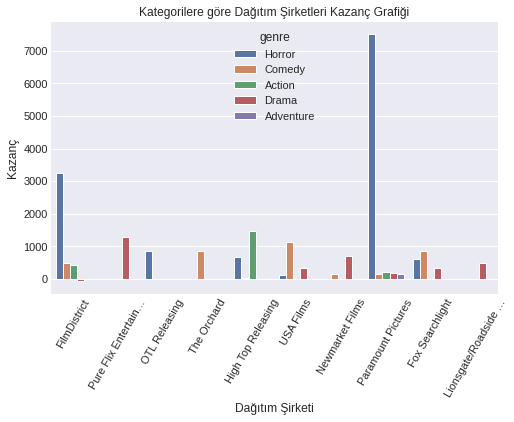

In [ ]:
# soru-3 : En çok kazanç elde eden dağıtım şirketleri göz önüne alınırsa bu kazanca hangi kategorilerin daha çok etkisi vardır?
df_rev_dist=df_filter_after_1999.groupby(["distributor"])[["production_budget", "worldwide_gross","revenue"]].agg(np.mean).sort_values(by="revenue", ascending=False)
most_revenue_by_prod = df_rev_dist.nlargest(n=10, columns=["revenue"]).index

df_rev_dist_genre = df_filter_after_1999.groupby(["distributor", "genre"])[["production_budget", "worldwide_gross","revenue"]].agg(np.mean).sort_values(by="revenue", ascending=False)
df_rev_dist_genre = df_rev_dist_genre.loc[most_revenue_by_prod, :].reset_index()
ax = sns.barplot(data=df_rev_dist_genre, x="distributor", y="revenue", hue="genre")
ax.get_figure().set_size_inches(8, 5)
ax.tick_params(axis="x", rotation=60)
ax.set_xlabel("Dağıtım Şirketi")
ax.set_ylabel("Kazanç")
ax.set_title("Kategorilere göre Dağıtım Şirketleri Kazanç Grafiği")

Text(0.5, 1.0, 'En Çok Kazandıran Film Kategorisi')

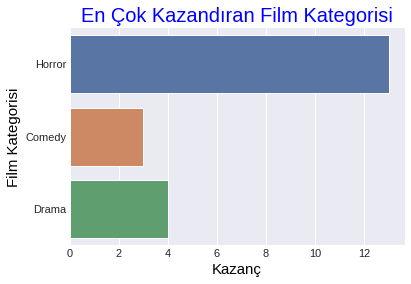

In [ ]:
#soru-4 :En çok kar elde eden 20 dağıtım şirketinin kazançları göz önüne alındığında totalde hangi kategorinin öne çıktığının sonucu aranmaktadır. Çıkan kategori Korku Filmlerinin kazançta üstünlüğünü gösteriyor mu?

most_revenue_first_20 = df_filter_after_1999.nlargest(n=20, columns=["revenue"])
sns.countplot(data=most_revenue_first_20, y="genre")

plt.xlabel('Kazanç',fontsize = 15,color='black')
plt.ylabel('Film Kategorisi',fontsize = 15,color='black')
plt.title('En Çok Kazandıran Film Kategorisi',fontsize = 20,color='blue')
